In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

from seaborn import heatmap
from seaborn import countplot
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../Felles/TrondheimHousingDataCleaned.csv', sep = ',')
df

,Matrikkel / Org-Anr,Address,Housing type,Primary room,Usable area,Gross area,Year of construction,Floor,Plot size,Last sold,...,Lon,Year,Month,Day,Policy rate,CPI,Change CPI,HPI Norway,HPI Trondheim,Borrowing rate%
0,5001-20/88/0/0,"Skogvegen 32, 7058 CHARLOTTENLUND",Selveier enebolig,441,517,567,2007.0,0,970.8,2021-02-28,...,10.4927,2021,2,28,0.0,115.3,0.7,130.7,123.5,1.77
1,5001-410/683/0/34,"Dyre Halses gate 11, 7042 TRONDHEIM",Selveierleilighet,55,55,60,2004.0,7,1043.2,2021-03-01,...,10.4134,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
2,5001-404/418/0/69,"Tellefsens gate 8, 7030 TRONDHEIM",Selveierleilighet,135,144,144,2019.0,5,3673.0,2021-03-01,...,10.3973,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
3,5001-52/224/0/128,"Heggdalsringen 65, 7049 TRONDHEIM",Selveierleilighet,69,73,73,2019.0,5,4572.6,2021-03-01,...,10.4535,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
4,5001-76/267/0/15,"Siriusvegen 10 A, 7037 TRONDHEIM",Selveierleilighet,74,74,81,1995.0,3,9300.8,2021-03-01,...,10.4113,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20079,5001-408/99/0/8,"Brinken 9, 7016 TRONDHEIM",Selveierleilighet,92,93,93,1912.0,5,538.3,2024-02-28,...,10.4051,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56
20080,977248744/16,"Anton Bergs veg 4 A, 7099 FLATÅSEN",Borettslagsleilighet,111,122,130,1998.0,1,8100.0,2024-02-28,...,10.3505,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56
20081,5001-95/128/0/0,"Gamle Åsvei 61, 7020 TRONDHEIM",Selveier enebolig,175,242,0,1925.0,0,801.0,2024-02-28,...,10.3541,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56
20082,5001-411/201/0/48,"Anders Buens gate 19, 7067 TRONDHEIM",Selveierleilighet,46,54,54,1939.0,4,1533.2,2024-02-28,...,10.4277,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56


In [3]:
df.columns

Index(['Matrikkel / Org-Anr', 'Address', 'Housing type', 'Primary room',
       'Usable area', 'Gross area', 'Year of construction', 'Floor',
       'Plot size', 'Last sold', 'Price', 'Joint debt at last sale',
       'Total price at last sale', 'Number of rooms', 'Number of bedrooms',
       'Registered date', 'Turnover rate', 'Broker', 'Postal code',
       'Broker encoded', 'Housing type encoded', 'Balcony_Yes', 'Parking_Yes',
       'Lat', 'Lon', 'Year', 'Month', 'Day', 'Policy rate', 'CPI',
       'Change CPI', 'HPI Norway', 'HPI Trondheim', 'Borrowing rate%'],
      dtype='object')

In [4]:
X = df.select_dtypes(include = ['int','float']).drop(columns = ['Price', 'Total price at last sale'])
y = df['Total price at last sale']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
model_1 = DecisionTreeRegressor(random_state = 42)
model_1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

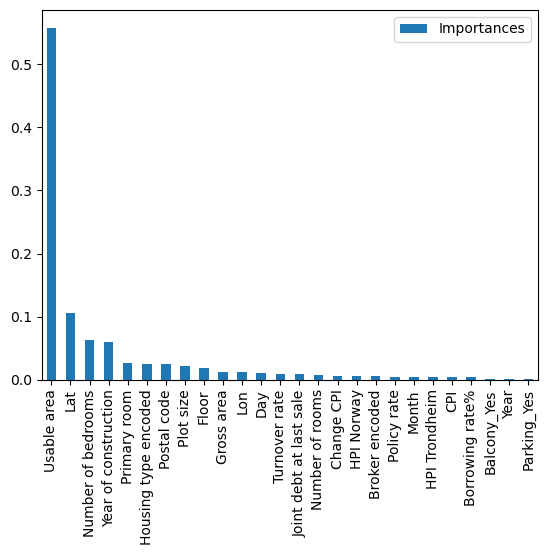

In [83]:

importances = pd.DataFrame(model_1.feature_importances_, columns = ['Importances'],
                                                        index = X_train.columns)
importances.sort_values(by = ['Importances'], axis = 0, ascending = False, inplace = True)

importances.plot(kind = 'bar')
plt.show()


In [16]:
fimp = pd.DataFrame({'Columns' : X_train.columns, 'Importance': model_1.feature_importances_})
fimp = fimp.sort_values(by = 'Importance', ascending = False)
fimp

,Columns,Importance
1,Usable area,0.558623
15,Lat,0.105857
8,Number of bedrooms,0.062443
3,Year of construction,0.060307
0,Primary room,0.026920
12,Housing type encoded,0.024894
10,Postal code,0.024640
5,Plot size,0.021543
4,Floor,0.018680
2,Gross area,0.011787


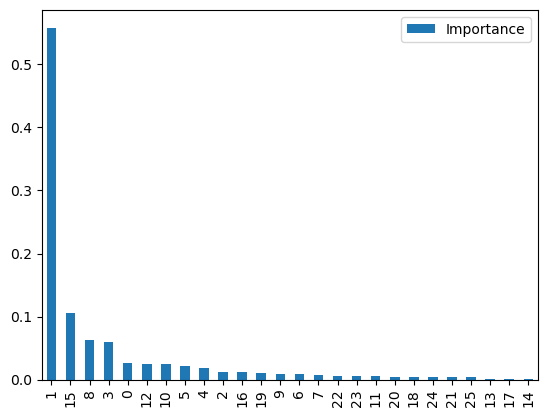

In [81]:

fimp.plot(kind = 'bar')
plt.show()

In [82]:
fimp['Importance'].sum()

0.9999999999999998

In [17]:
y_fit1 = model_1.predict(X_train)
y_pred1 = model_1.predict(X_test)

In [71]:
print(model_1.score(X_train, y_train))
print(model_1.score(X_test, y_test))

0.9977816513900539
0.7492187556092926


In [18]:
from sklearn.metrics import mean_absolute_error as MAE 

In [19]:
print('MAE on train', MAE(y_train, y_fit1))
print('MAE on test', MAE(y_test, y_pred1))

MAE on train 8111.961612548466
MAE on test 556060.3487598449


In [20]:
print('test ME', np.mean(y_pred1 - y_test))

test ME 2561.1029862922064


In [21]:
#We need to prune this model!!

In [31]:
model_2 = DecisionTreeRegressor(random_state = 42)

#Begin cost complexity pruning path 
path = model_2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

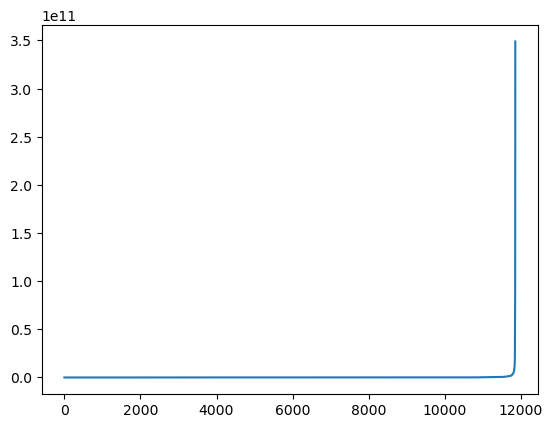

In [32]:
pd.Series(ccp_alphas).plot()
plt.show()
#Antall alphas på 12000

In [33]:
len(ccp_alphas)

11858

In [34]:
ccp_alphas = ccp_alphas[11000:]

In [35]:
len(ccp_alphas)

858

In [37]:
model_list = []
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(ccp_alpha = alpha, random_state = 42)
    model.fit(X_train, y_train)
    model_list.append(model)

In [39]:
train_scores = [model.score(X_train, y_train) for model in model_list]
test_scores = [model.score(X_test, y_test) for model in model_list]

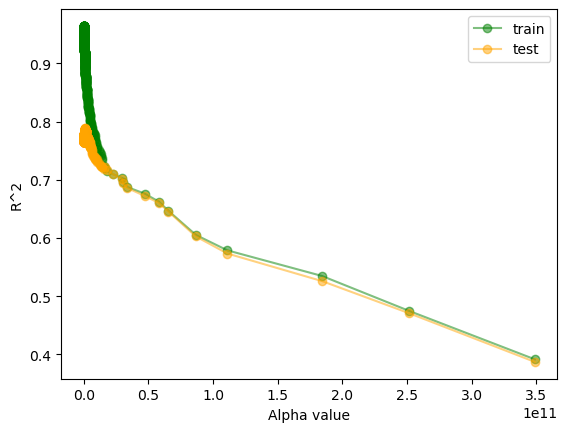

In [42]:
# Plot the scores for both the train and test set
# based on alpha values
plt.plot(ccp_alphas, train_scores, marker='o', alpha=.5, label='train', color='green')
plt.plot(ccp_alphas, test_scores, marker='o', alpha=.5, label='test', color='orange')
plt.xlabel('Alpha value')
plt.ylabel('R^2') # R^2 used for regression problems, mean accuracy for classificat
plt.legend()
plt.show()

In [43]:
# Use cross validation to find the best alpha value
from sklearn.model_selection import cross_val_score
alpha_loop_values = []
for alpha in ccp_alphas:

    model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=2)

    alpha_loop_values.append([alpha, np.mean(scores), np.std(scores)])

In [44]:
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns = ['Alpha', 'Mean_Accuracy', 'StDev_Accuracy'])
alpha_results.head(3)

,Alpha,Mean_Accuracy,StDev_Accuracy
0,1.529557e+08,0.660501,0.024817
1,1.532736e+08,0.660638,0.024954
2,1.539252e+08,0.660475,0.024763


In [52]:
alpha_results.shape

(858, 3)

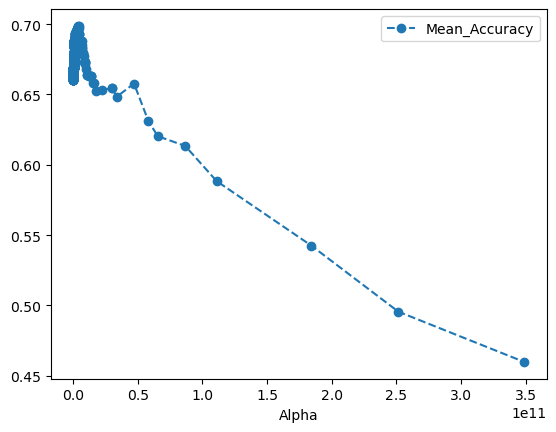

In [53]:
alpha_results.plot(x='Alpha', y='Mean_Accuracy',
 marker = 'o', linestyle = '--')
plt.show()

In [58]:
ideal_alpha = alpha_results[alpha_results['Mean_Accuracy'] 
                            == max(alpha_results['Mean_Accuracy'])].Alpha 
ideal_alpha = float(ideal_alpha[800])

In [73]:
model_pruned = DecisionTreeRegressor(ccp_alpha = ideal_alpha, 
                                     random_state = 42)
model_pruned.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=4197605032.1241074, random_state=42)

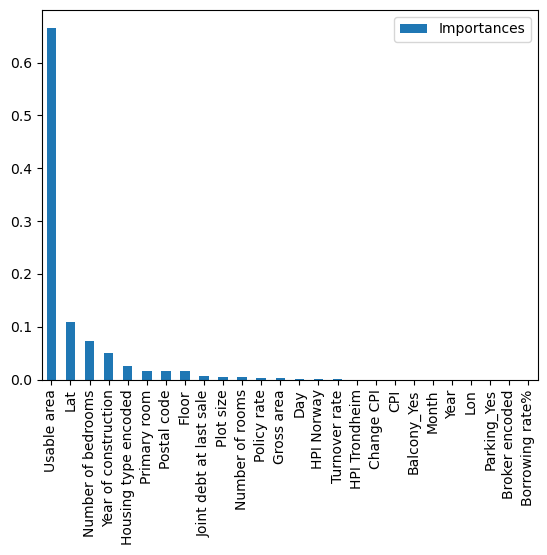

In [84]:
i = pd.DataFrame(model_pruned.feature_importances_, columns = ['Importances'],
                                                        index = X_train.columns)
i.sort_values(by = ['Importances'], axis = 0, ascending = False, inplace = True)

i.plot(kind = 'bar')
plt.show()

In [74]:
y_fit2 = model_pruned.predict(X_train)
y_pred2 = model_pruned.predict(X_test)

In [75]:
print('MAE on train:', MAE(y_train, y_fit2))
print('MAE on test:', MAE(y_test, y_pred2))

MAE on train: 588141.1838479365
MAE on test: 638630.5805294804


In [76]:
from sklearn.tree import plot_tree

In [77]:
X_names = X.columns.to_list()
X_names

['Primary room',
 'Usable area',
 'Gross area',
 'Year of construction',
 'Floor',
 'Plot size',
 'Joint debt at last sale',
 'Number of rooms',
 'Number of bedrooms',
 'Turnover rate',
 'Postal code',
 'Broker encoded',
 'Housing type encoded',
 'Balcony_Yes',
 'Parking_Yes',
 'Lat',
 'Lon',
 'Year',
 'Month',
 'Day',
 'Policy rate',
 'CPI',
 'Change CPI',
 'HPI Norway',
 'HPI Trondheim',
 'Borrowing rate%']

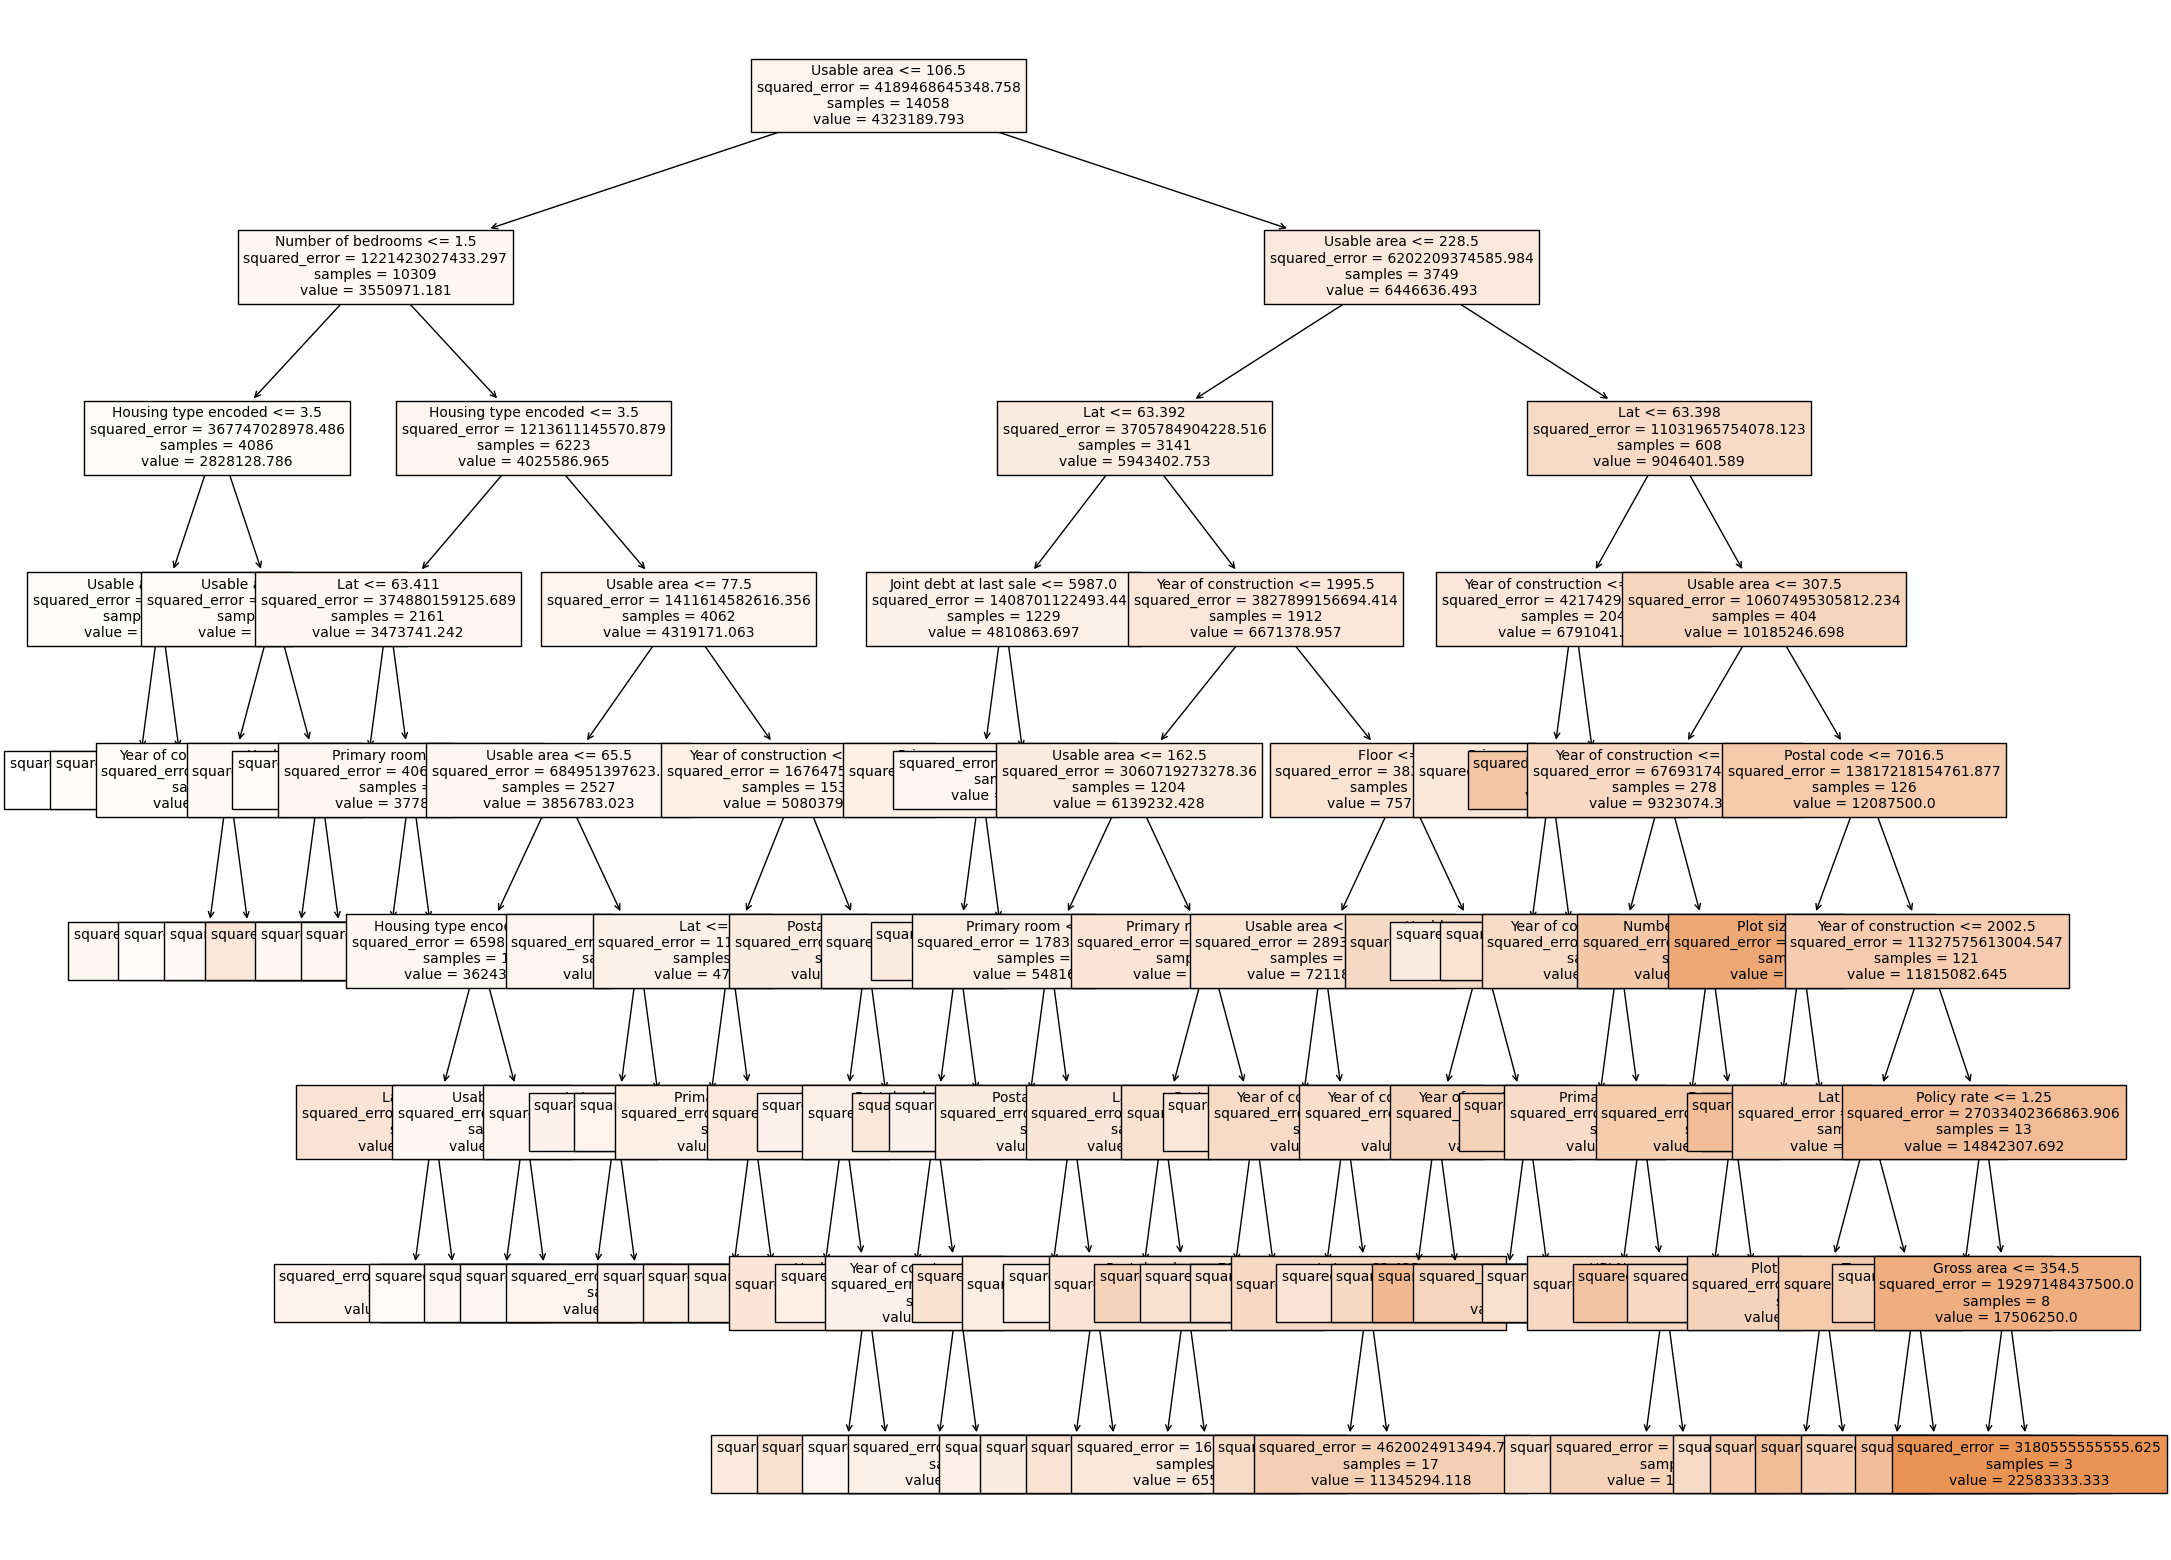

In [78]:
fig = plt.figure(figsize=(25,20))
plot_tree(model_pruned, feature_names = X_names, filled = True, fontsize = 10)
plt.show()

In [79]:
print('Test ME:', np.mean((y_pred2-y_test))) #mean error
# if positive the model is predicting higher values. 

Test ME: -16971.56569356687


In [80]:
print(model_pruned.score(X_train, y_train))
print(model_pruned.score(X_test, y_test))

0.815970434925324
0.7649529761303195
